In [62]:
import pandas as pd

In [63]:
data=pd.read_csv("Steel_industry_data.csv")

In [64]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [65]:
import matplotlib.pyplot as plt

In [66]:
data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [67]:
data['z']=(data["Usage_kWh"]-data["Usage_kWh"].mean())/data["Usage_kWh"].std()

In [68]:
data=data[data['z']<3]

In [69]:
# data.drop(columns=['z'])

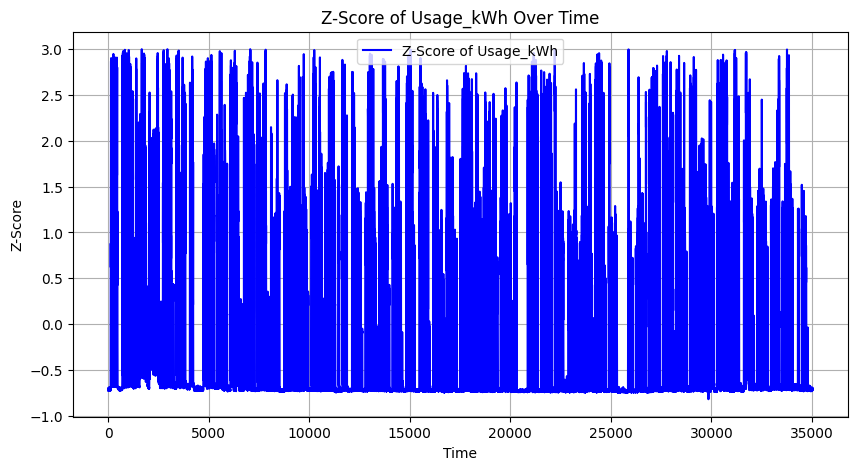

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(data['z'].index, data['z'], label='Z-Score of Usage_kWh', color='blue')
plt.xlabel("Time")
plt.ylabel("Z-Score")
plt.title("Z-Score of Usage_kWh Over Time")
plt.grid(True)
plt.legend()
plt.show()

In [71]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# plt.plot(data['date'], data['Usage_kWh'], linewidth=1)

# # Set labels and title
# plt.ylabel('Usage (kWh)')
# plt.xlabel('Date')
# plt.title('Energy Usage Over Time')

# # Add grid lines
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Tight layout
# plt.tight_layout()

# # Show the plot
# plt.show()



In [72]:
# plt.savefig('energy_usage.png', dpi=300)


array([[<Axes: title={'center': 'Usage_kWh'}>,
        <Axes: title={'center': 'Lagging_Current_Reactive.Power_kVarh'}>,
        <Axes: title={'center': 'Leading_Current_Reactive_Power_kVarh'}>],
       [<Axes: title={'center': 'CO2(tCO2)'}>,
        <Axes: title={'center': 'Lagging_Current_Power_Factor'}>,
        <Axes: title={'center': 'Leading_Current_Power_Factor'}>],
       [<Axes: title={'center': 'NSM'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

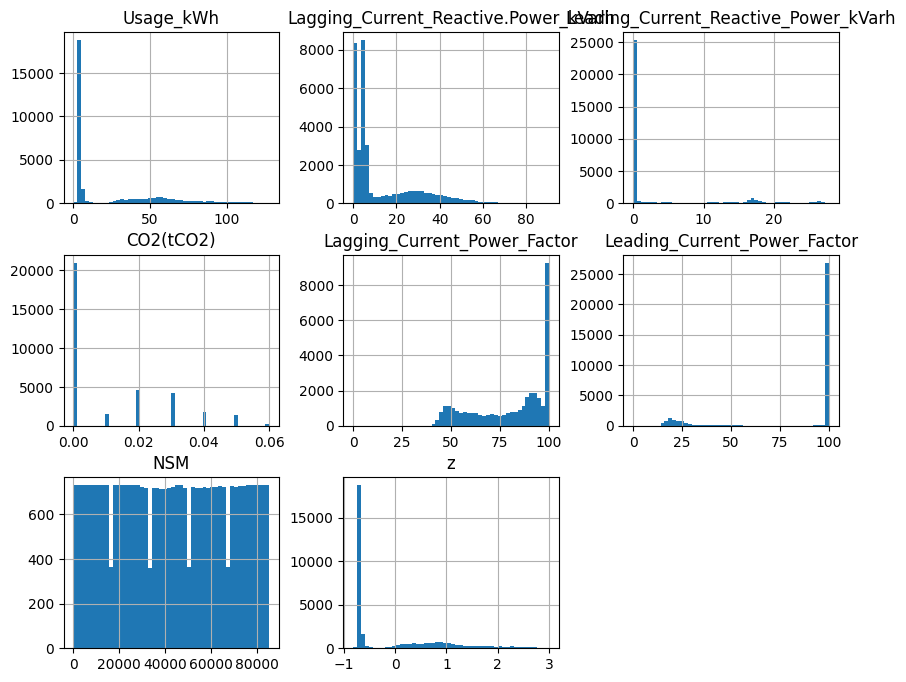

In [73]:
data.hist(figsize=(10, 8), bins=50)

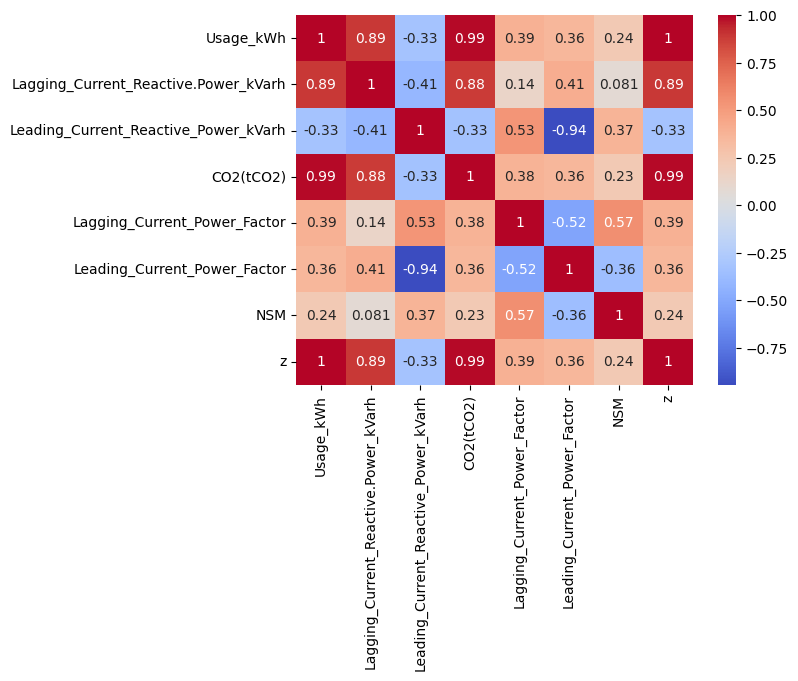

In [74]:
import numpy as np
import seaborn as sns

corr_matrix = data.drop(columns=["date","WeekStatus","Day_of_week","Load_Type"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


# preporcessing

**set load type**

In [75]:
data["Load_Type"].value_counts()

Load_Type
Light_Load      18052
Medium_Load      9599
Maximum_Load     7177
Name: count, dtype: int64

In [76]:
def setLoadTypes(type):
    if type=="Light_Load":
        return 1
    elif type=="Medium_Load":
        return 2
    else:
        return 3

data["Load_Type_tok"]=data["Load_Type"].apply(setLoadTypes)

In [77]:
data['Load_Type'].value_counts(),data["Load_Type_tok"].value_counts()

(Load_Type
 Light_Load      18052
 Medium_Load      9599
 Maximum_Load     7177
 Name: count, dtype: int64,
 Load_Type_tok
 1    18052
 2     9599
 3     7177
 Name: count, dtype: int64)

In [78]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,z,Load_Type_tok
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,-0.724095,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,-0.699277,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,-0.722002,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,-0.719908,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,-0.704659,1


**set week status**

In [79]:
encoded_data=pd.get_dummies(data, columns=["WeekStatus"])

In [80]:
encoded_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type,z,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Monday,Light_Load,-0.724095,1,True,False
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Monday,Light_Load,-0.699277,1,True,False
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Monday,Light_Load,-0.722002,1,True,False
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Monday,Light_Load,-0.719908,1,True,False
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Monday,Light_Load,-0.704659,1,True,False


**drop load, week**

In [81]:
After_droped_data=encoded_data.drop(columns=["Day_of_week","Load_Type","z"])

In [82]:
After_droped_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,True,False
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,True,False
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,True,False
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,True,False
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,True,False


**data resampled to hour**

In [83]:
After_droped_data['date'] = pd.to_datetime(After_droped_data['date'], format="%d/%m/%Y %H:%M")
After_droped_data.set_index('date', inplace=True)

In [84]:
After_droped_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
date,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,1,True,False
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,True,False
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,True,False
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,True,False
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,True,False


In [85]:
# data_resampled = After_droped_data.resample('1h').mean().reset_index()
data_resampled = After_droped_data

In [86]:
data_resampled.shape

(34828, 10)

In [87]:
data_resampled.corr()["Usage_kWh"]

Usage_kWh                               1.000000
Lagging_Current_Reactive.Power_kVarh    0.890876
Leading_Current_Reactive_Power_kVarh   -0.325413
CO2(tCO2)                               0.989502
Lagging_Current_Power_Factor            0.388078
Leading_Current_Power_Factor            0.355186
NSM                                     0.237840
Load_Type_tok                           0.620534
WeekStatus_Weekday                      0.293702
WeekStatus_Weekend                     -0.293702
Name: Usage_kWh, dtype: float64

label encode load type

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
encoder = LabelEncoder()
data_resampled['Load_Type_tok'] = encoder.fit_transform(data_resampled['Load_Type_tok'])

In [90]:
data_resampled.value_counts("Load_Type_tok")

Load_Type_tok
0    18052
1     9599
2     7177
Name: count, dtype: int64

normalize

In [91]:
from sklearn.preprocessing import StandardScaler 

In [92]:
scaler=StandardScaler()

In [93]:
sc_col=["Lagging_Current_Reactive.Power_kVarh","Leading_Current_Reactive_Power_kVarh","CO2(tCO2)","Lagging_Current_Power_Factor","Leading_Current_Power_Factor","NSM"]

In [94]:
data_resampled[sc_col]=scaler.fit_transform(data_resampled[sc_col])

In [95]:
data_resampled.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
date,,,,,,,,,,
2018-01-01 00:15:00,3.17,-0.616122,-0.523403,-0.713837,-0.385285,0.515241,-1.673075,0,True,False
2018-01-01 00:30:00,4.00,-0.521097,-0.523403,-0.713837,-0.724942,0.515241,-1.637064,0,True,False
2018-01-01 00:45:00,3.24,-0.595355,-0.523403,-0.713837,-0.539818,0.515241,-1.601053,0,True,False
2018-01-01 01:00:00,3.31,-0.577735,-0.523403,-0.713837,-0.655323,0.515241,-1.565043,0,True,False
2018-01-01 01:15:00,3.82,-0.518580,-0.523403,-0.713837,-0.833063,0.515241,-1.529032,0,True,False


# get x, y

In [96]:
x=data_resampled.drop(columns=["Usage_kWh"])
y=data_resampled["Usage_kWh"]

In [97]:
x.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
date,,,,,,,,,
2018-01-01 00:15:00,-0.616122,-0.523403,-0.713837,-0.385285,0.515241,-1.673075,0,True,False
2018-01-01 00:30:00,-0.521097,-0.523403,-0.713837,-0.724942,0.515241,-1.637064,0,True,False
2018-01-01 00:45:00,-0.595355,-0.523403,-0.713837,-0.539818,0.515241,-1.601053,0,True,False
2018-01-01 01:00:00,-0.577735,-0.523403,-0.713837,-0.655323,0.515241,-1.565043,0,True,False
2018-01-01 01:15:00,-0.518580,-0.523403,-0.713837,-0.833063,0.515241,-1.529032,0,True,False


In [98]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34828 entries, 2018-01-01 00:15:00 to 2018-12-31 00:00:00
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Lagging_Current_Reactive.Power_kVarh  34828 non-null  float64
 1   Leading_Current_Reactive_Power_kVarh  34828 non-null  float64
 2   CO2(tCO2)                             34828 non-null  float64
 3   Lagging_Current_Power_Factor          34828 non-null  float64
 4   Leading_Current_Power_Factor          34828 non-null  float64
 5   NSM                                   34828 non-null  float64
 6   Load_Type_tok                         34828 non-null  int64  
 7   WeekStatus_Weekday                    34828 non-null  bool   
 8   WeekStatus_Weekend                    34828 non-null  bool   
dtypes: bool(2), float64(6), int64(1)
memory usage: 2.2 MB


In [99]:
def boolenSet(x):
    if x==True:
        return 1
    else:
        return 0
    


In [100]:
x["WeekStatus_Weekday_bool"]=x["WeekStatus_Weekday"].apply(boolenSet)

In [101]:
x["WeekStatus_Weekend_bool"]=x["WeekStatus_Weekend"].apply(boolenSet)

In [102]:
x=x.drop(columns=["WeekStatus_Weekday","WeekStatus_Weekend"])

In [103]:
x.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday_bool,WeekStatus_Weekend_bool
date,,,,,,,,,
2018-01-01 00:15:00,-0.616122,-0.523403,-0.713837,-0.385285,0.515241,-1.673075,0,1,0
2018-01-01 00:30:00,-0.521097,-0.523403,-0.713837,-0.724942,0.515241,-1.637064,0,1,0
2018-01-01 00:45:00,-0.595355,-0.523403,-0.713837,-0.539818,0.515241,-1.601053,0,1,0
2018-01-01 01:00:00,-0.577735,-0.523403,-0.713837,-0.655323,0.515241,-1.565043,0,1,0
2018-01-01 01:15:00,-0.518580,-0.523403,-0.713837,-0.833063,0.515241,-1.529032,0,1,0


In [104]:
y.describe()

count    34828.000000
mean        26.732380
std         32.470343
min          0.000000
25%          3.200000
50%          4.540000
75%         50.650000
max        127.690000
Name: Usage_kWh, dtype: float64

In [105]:
y[0:5]

date
2018-01-01 00:15:00    3.17
2018-01-01 00:30:00    4.00
2018-01-01 00:45:00    3.24
2018-01-01 01:00:00    3.31
2018-01-01 01:15:00    3.82
Name: Usage_kWh, dtype: float64

creating windows

In [106]:
import numpy as np


In [107]:
def create_sliding_windows(x,y,window_size):
    x_win, y_win=[],[]
    for i in range(len(x)-window_size):
        window=x[i:(i+window_size)]
        usage=y[i+window_size]
        x_win.append(window)
        y_win.append(usage)
    return np.array(x_win), np.array(y_win)

In [108]:
window_sizes=[1,4,8,12,16]

final_data={}

for size in window_sizes:
    x_temp,y_temp= create_sliding_windows(x,y,size)
    final_data[f'win_{size}']=(x_temp, y_temp)


C:\Users\dinit\AppData\Local\Temp\ipykernel_18356\1595492573.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  usage=y[i+window_size]


**data spliting**

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
train_test={}

In [111]:
for batch in final_data:
    print(len(final_data[batch][1]),"--",len(final_data[batch][0]))
    x_tr, x_te, y_tr, y_te=train_test_split(final_data[batch][0],final_data[batch][1],train_size=0.82, shuffle=False)
    print("-->", len(x_tr), "  ", len(x_te), "  ", len(y_tr), "  ", len(y_te))
    train_test[batch]={
        "x_train":x_tr,
        "x_test":x_te,
        "y_train":y_tr,
        "y_test":y_te
    }


34827 -- 34827
--> 28558    6269    28558    6269
34824 -- 34824
--> 28555    6269    28555    6269
34820 -- 34820
--> 28552    6268    28552    6268
34816 -- 34816
--> 28549    6267    28549    6267
34812 -- 34812
--> 28545    6267    28545    6267


In [112]:
train_test['win_1']['x_train']

array([[[-0.61612242, -0.52340271, -0.71383698, ...,  0.        ,
          1.        ,  0.        ]],

       [[-0.52109743, -0.52340271, -0.71383698, ...,  0.        ,
          1.        ,  0.        ]],

       [[-0.59535537, -0.52340271, -0.71383698, ...,  0.        ,
          1.        ,  0.        ]],

       ...,

       [[ 1.49519428, -0.52340271,  0.55687676, ...,  0.        ,
          0.        ,  1.        ]],

       [[ 0.39013553, -0.52340271,  0.55687676, ...,  0.        ,
          0.        ,  1.        ]],

       [[ 0.53487557, -0.52340271,  0.55687676, ...,  1.        ,
          0.        ,  1.        ]]])

In [113]:
train_test['win_1']['y_train']

array([ 4.  ,  3.24,  3.31, ..., 45.72, 46.15, 44.71])

In [114]:
train_test['win_1']['x_train'].shape

(28558, 1, 9)

In [115]:
train_test['win_1']['x_train'].shape[1],train_test['win_1']['x_train'].shape[2]

(1, 9)

# model creating and training

In [116]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [117]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))


In [118]:
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

single layer

In [119]:
single_LSTM_models = {}

In [121]:
for batch in train_test:
    print(batch)
    x_train=train_test[batch]["x_train"]
    y_train=train_test[batch]["y_train"]
    x_test=train_test[batch]["x_test"]
    y_test=train_test[batch]["y_test"]

    print("---->", x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)
    
    single_LSTM_models[batch] = {
        "model": model,
        "history": history
    }

    output=model(x_train)
    print("---->", output.shape)

win_1
----> (28558, 1, 9) (28558,) (6269, 1, 9) (6269,)
Epoch 1/20


c:\Users\dinit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


714/714 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1388.9575 - mse: 1388.9575 - val_loss: 917.0245 - val_mse: 917.0245
Epoch 2/20
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1132.8832 - mse: 1132.8832 - val_loss: 916.4951 - val_mse: 916.4951
Epoch 3/20
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1103.5157 - mse: 1103.5157 - val_loss: 923.4653 - val_mse: 923.4653
Epoch 4/20
714/714 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1145.8488 - mse: 1145.8488 - val_loss: 923.7780 - val_mse: 923.7780
Epoch 5/20
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1118.7999 - mse: 1118.7999 - val_loss: 911.3278 - val_mse: 911.3278
Epoch 6/20
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1123.9011 - mse: 1123.9011 - val_loss: 927.0064 - val_mse: 927.0064
Epoch 7/20
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1129.5350 - mse: 1129.5350 - val_loss: 911.7477 - val_mse: 911.7477
Epoch 8/20
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1110.0883 - mse: 1110.0883 - val_loss: 914.2182 - val_m

In [ ]:
single_LSTM_models['win_1']['history'].shape

AttributeError: 'History' object has no attribute 'shape'

win_1
win_4
win_8
win_12
win_16


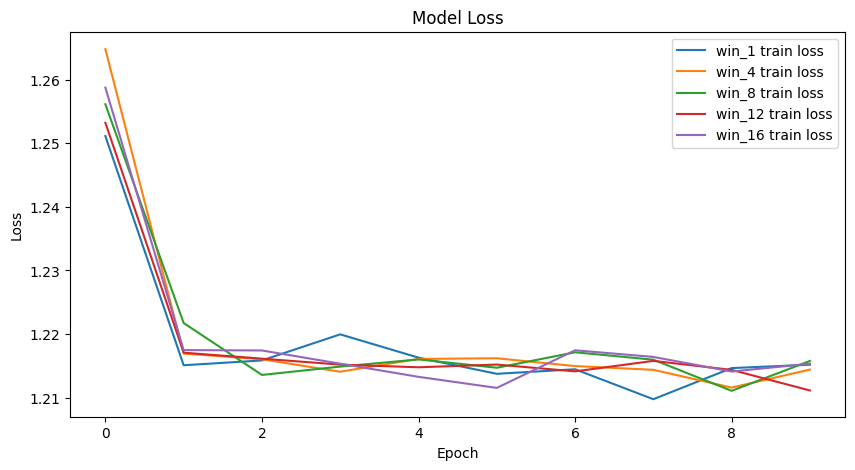

In [ ]:
plt.figure(figsize=(10, 5))
for batch in single_LSTM_models:
    print(batch)
    model = single_LSTM_models[batch]["model"]
    history = single_LSTM_models[batch]["history"]

    plt.plot(history.history['loss'], label=f'{batch} train loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()  # Add legend to the graph
plt.show()

double layer

In [ ]:
double_LSTM_models = {}

for batch in train_test:
    print(batch)
    x_train=train_test[batch]["x_train"]
    y_train=train_test[batch]["y_train"]
    x_test=train_test[batch]["x_test"]
    y_test=train_test[batch]["y_test"]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss=rmse, metrics=['mse'])
    
    history = model.fit(x_train, y_train.reshape(-1,1), epochs=15,  verbose=1)
    
    double_LSTM_models[batch]={
        "model":model,
        "history":history
    }

win_1
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 33.3194 - mse: 1248.8944
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18.0505 - mse: 340.2673
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15.9039 - mse: 265.6124
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.9574 - mse: 234.2784
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.4488 - mse: 217.3403
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.2924 - mse: 212.6735
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.9100 - mse: 201.4665
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.9508 - mse: 204.2948
Epoch 9/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.7442 - mse: 197.0663
Epoch 10/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.0472 - mse: 206.2012
Epoch 11/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.0796 - mse: 182.5812
Epoch 12/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.253

In [ ]:
plt.figure(figsize=(10, 5))
for batch in double_LSTM_models:
    print(batch)
    model = double_LSTM_models[batch]["model"]
    history = double_LSTM_models[batch]["history"]

    plt.plot(history.history['loss'], label=f'{batch} train loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()  # Add legend to the graph
plt.show()

win_1


TypeError: tuple indices must be integers or slices, not str

<Figure size 1000x500 with 0 Axes>

Bidirectional layer

In [ ]:
from keras.layers import Bidirectional

In [ ]:
from tensorflow.keras.layers import LSTM

bidirectional_LSTM_models = {}

for batch in train_test:
    print(batch)
    x_train=train_test[batch]["x_train"]
    y_train=train_test[batch]["y_train"]
    x_test=train_test[batch]["x_test"]
    y_test=train_test[batch]["y_test"]

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.Bidirectional(LSTM(64 , activation='relu')),
        tf.keras.layers.LSTM(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # model.compile(optimizer='adam', loss=rmse, metrics=['mse'])
    
    # history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # bidirectional_LSTM_models[batch]=(model, history)
    


win_1


ValueError: Input 0 of layer "lstm_68" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)

In [ ]:
y_t=train_test['win_4']['y_train'].reshape(-1,1)

In [ ]:
y_t.shape

(28555, 1)

In [ ]:
y_t

array([[ 3.82],
       [ 3.28],
       [ 3.6 ],
       ...,
       [45.72],
       [46.15],
       [44.71]])

In [ ]:
train_test['win_4']['x_train'].shape

(28555, 4, 9)

In [ ]:
single_LSTM.fit(train_test['win_4']['x_train'], y_t, epochs=50)

NameError: name 'single_LSTM' is not defined

In [ ]:
loss = single_LSTM.evaluate(train_test['win_1']['x_test'],train_test['win_1']['y_test'])
print(f"Test Loss: {loss}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.3508 - mse: 746.8795 
Test Loss: [22.721452713012695, 644.0781860351562]


In [ ]:
train_test['win_1']['x_test']

array([[[-0.44257226, -0.57526775, -0.7646259 , ...,  0.        ,
          0.        ,  1.        ]],

       [[-0.46735896, -0.57526775, -0.7646259 , ...,  0.        ,
          0.        ,  1.        ]],

       [[ 1.12002255, -0.57526775,  0.06473975, ...,  0.        ,
          0.        ,  1.        ]],

       ...,

       [[-0.89751146,  1.91137534, -0.7646259 , ...,  0.        ,
          1.        ,  0.        ]],

       [[-0.89751146,  1.41129741, -0.7646259 , ...,  0.        ,
          1.        ,  0.        ]],

       [[-0.6849311 , -0.08150581, -0.7646259 , ...,  0.        ,
          1.        ,  0.        ]]])

In [ ]:
pre=single_LSTM.predict(train_test['win_1']['x_test'])

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
pre

array([[ 0.4613157],
       [ 0.7152523],
       [17.252071 ],
       ...,
       [-0.5824857],
       [-1.302568 ],
       [-2.1012185]], dtype=float32)

In [ ]:
train_test['win_1']['y_test']

array([ 3.1675, 31.9225, 45.4575, ...,  3.4375,  3.5375,  3.7875])

In [ ]:
i=range(0,len(train_test['win_1']['y_test']))

In [ ]:
len(pre)

1577

In [ ]:
len(train_test['win_1']['y_test'])

1577

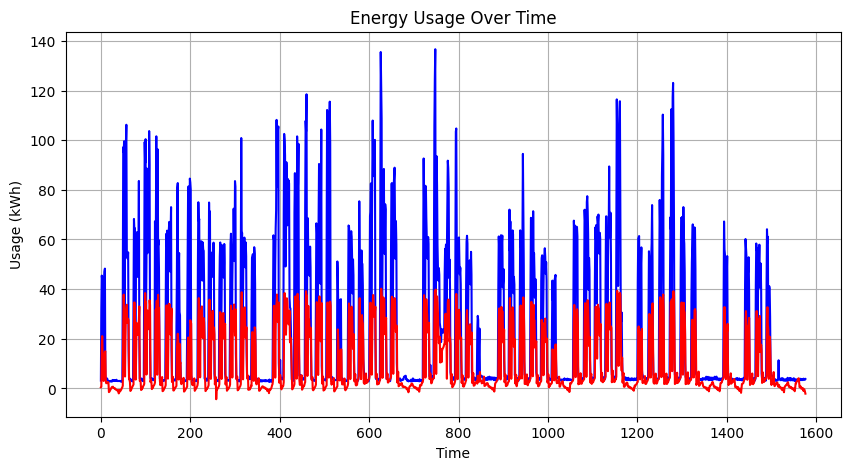

In [ ]:
import matplotlib.pyplot as plt

# Plot a line graph (example: Usage_kWh over time)
plt.figure(figsize=(10, 5))
plt.plot(i, train_test['win_1']['y_test'], label='Actual Usage', color='blue')
plt.plot(i, pre, label='Predicted Usage', color='red')
plt.xlabel("Time")
plt.ylabel("Usage (kWh)")
plt.title("Energy Usage Over Time")
plt.grid(True)
plt.show()